In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df1 = pd.read_csv('./data/TimeProvince.csv', index_col=['date','province'], parse_dates=True, infer_datetime_format=True)
df2 = pd.read_csv('./data/Weather.csv', index_col=['date','province'], parse_dates=True, infer_datetime_format=True)
df1 = df1.diff(periods=17)[17:]
df1 = df1[["confirmed","deceased"]]
df2 = df2[['avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity']]
df = df1.merge(df2, how="left", left_index=True, right_index=True).dropna()


/Users/tim/opt/anaconda3/envs/siads-generic/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


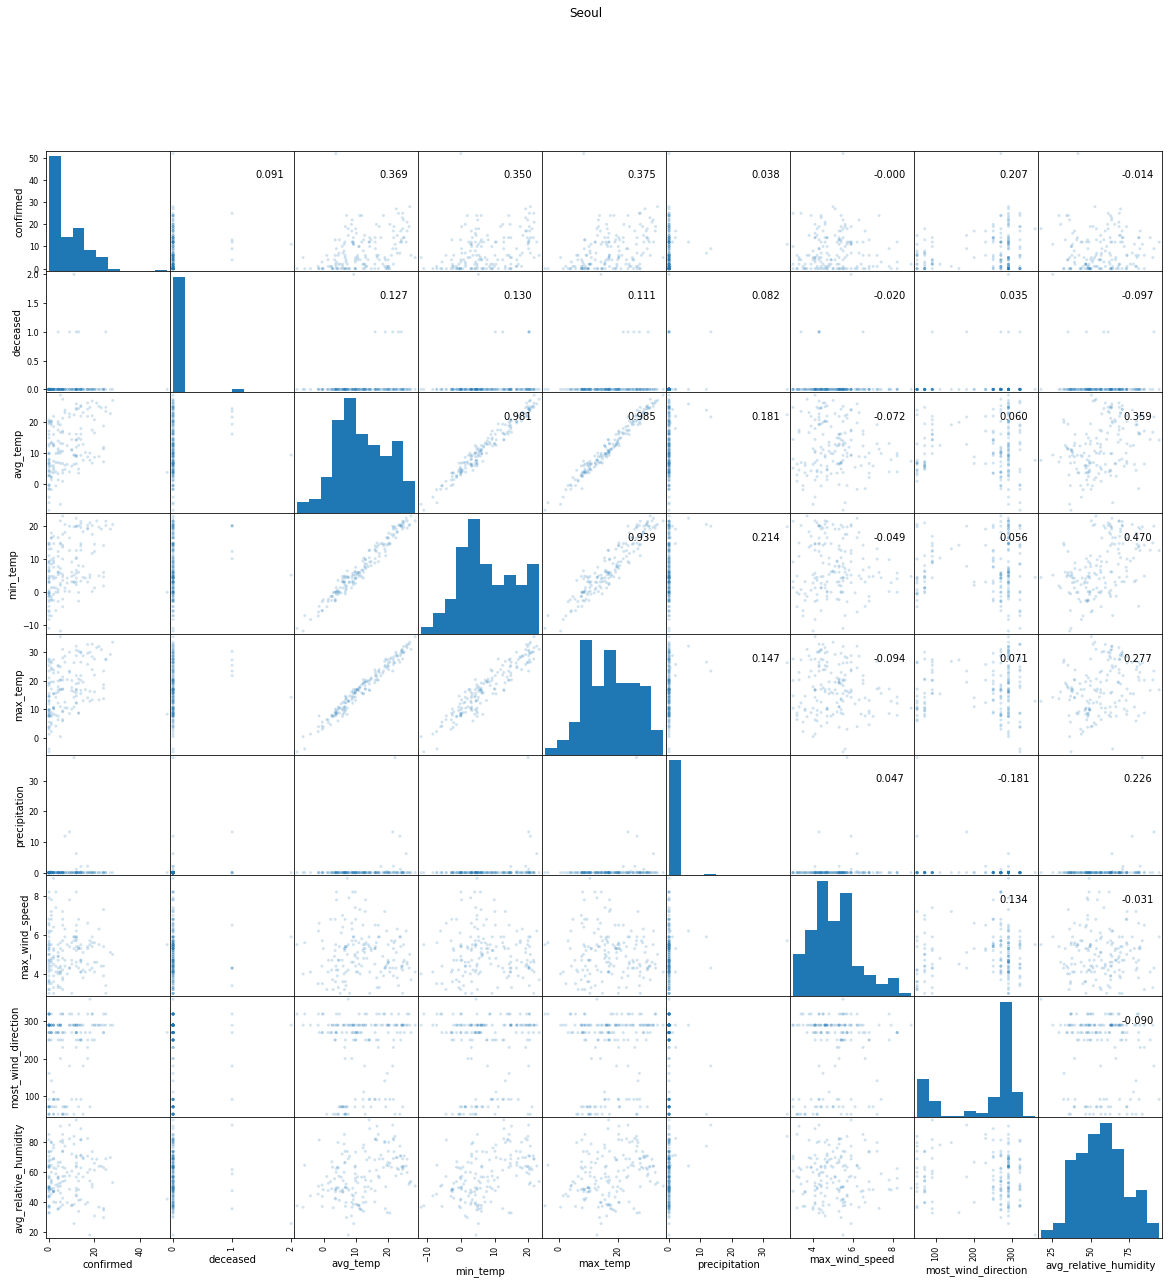

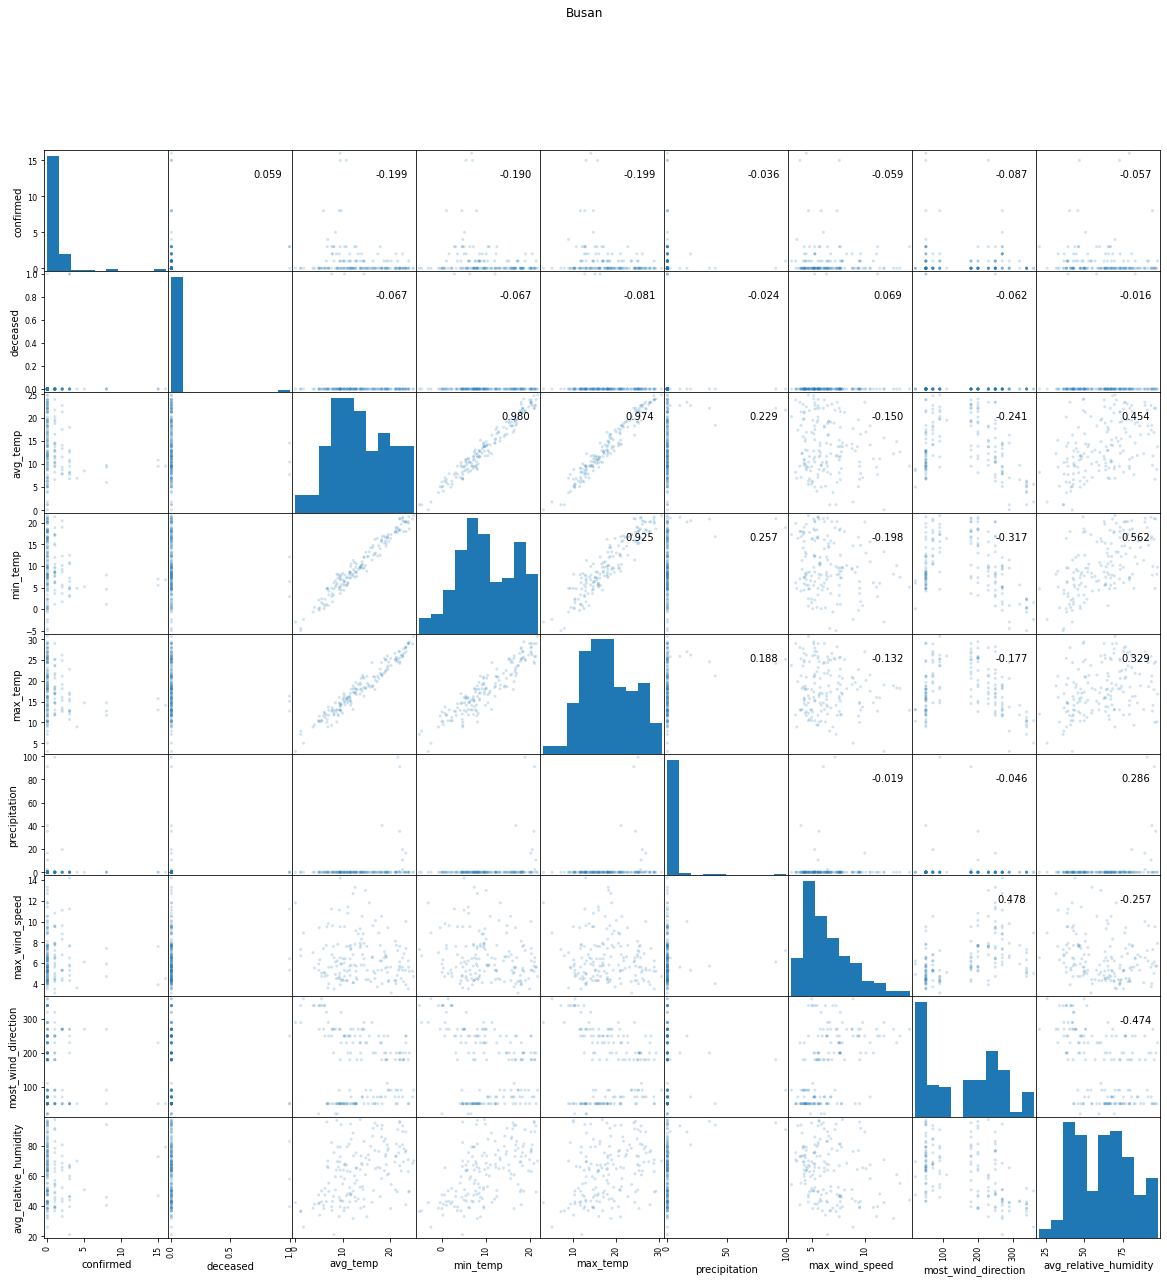

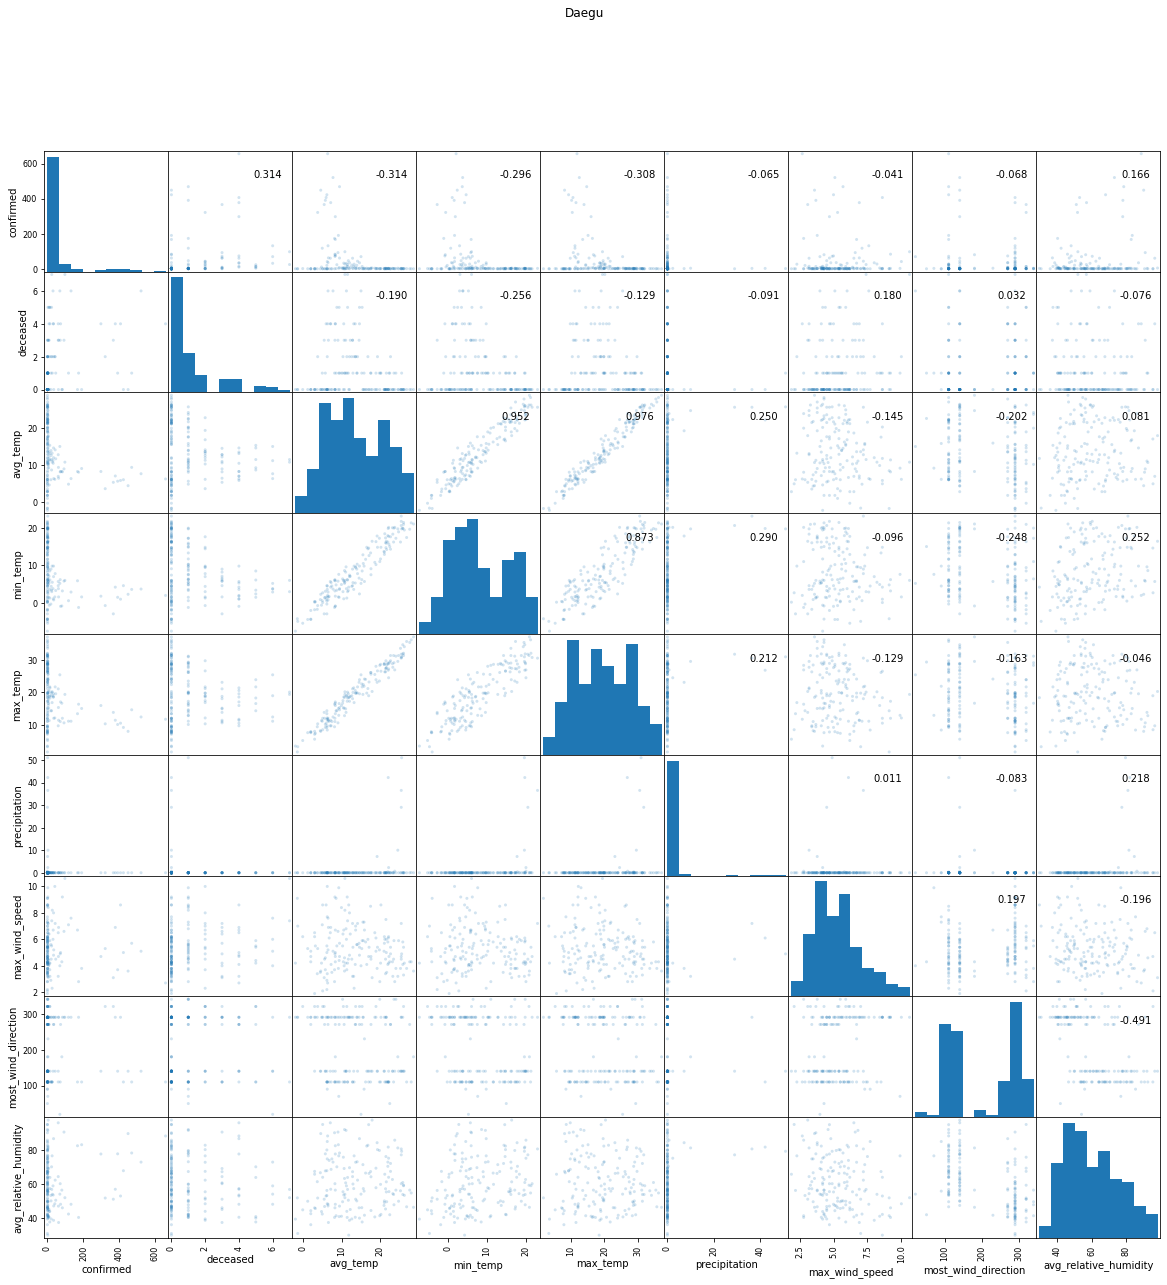

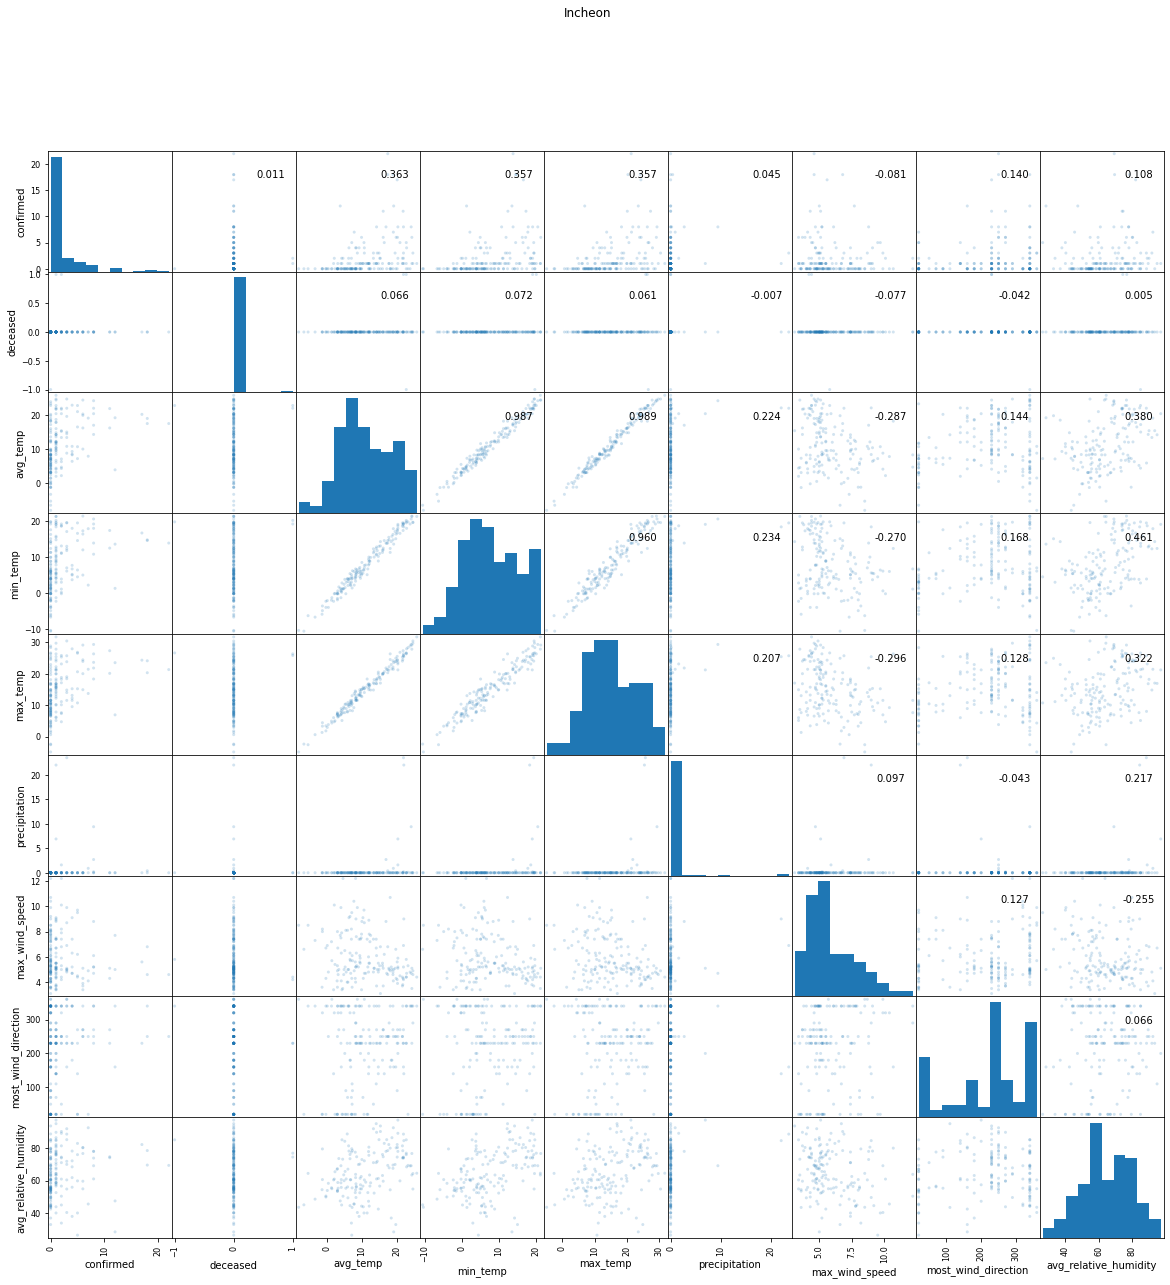

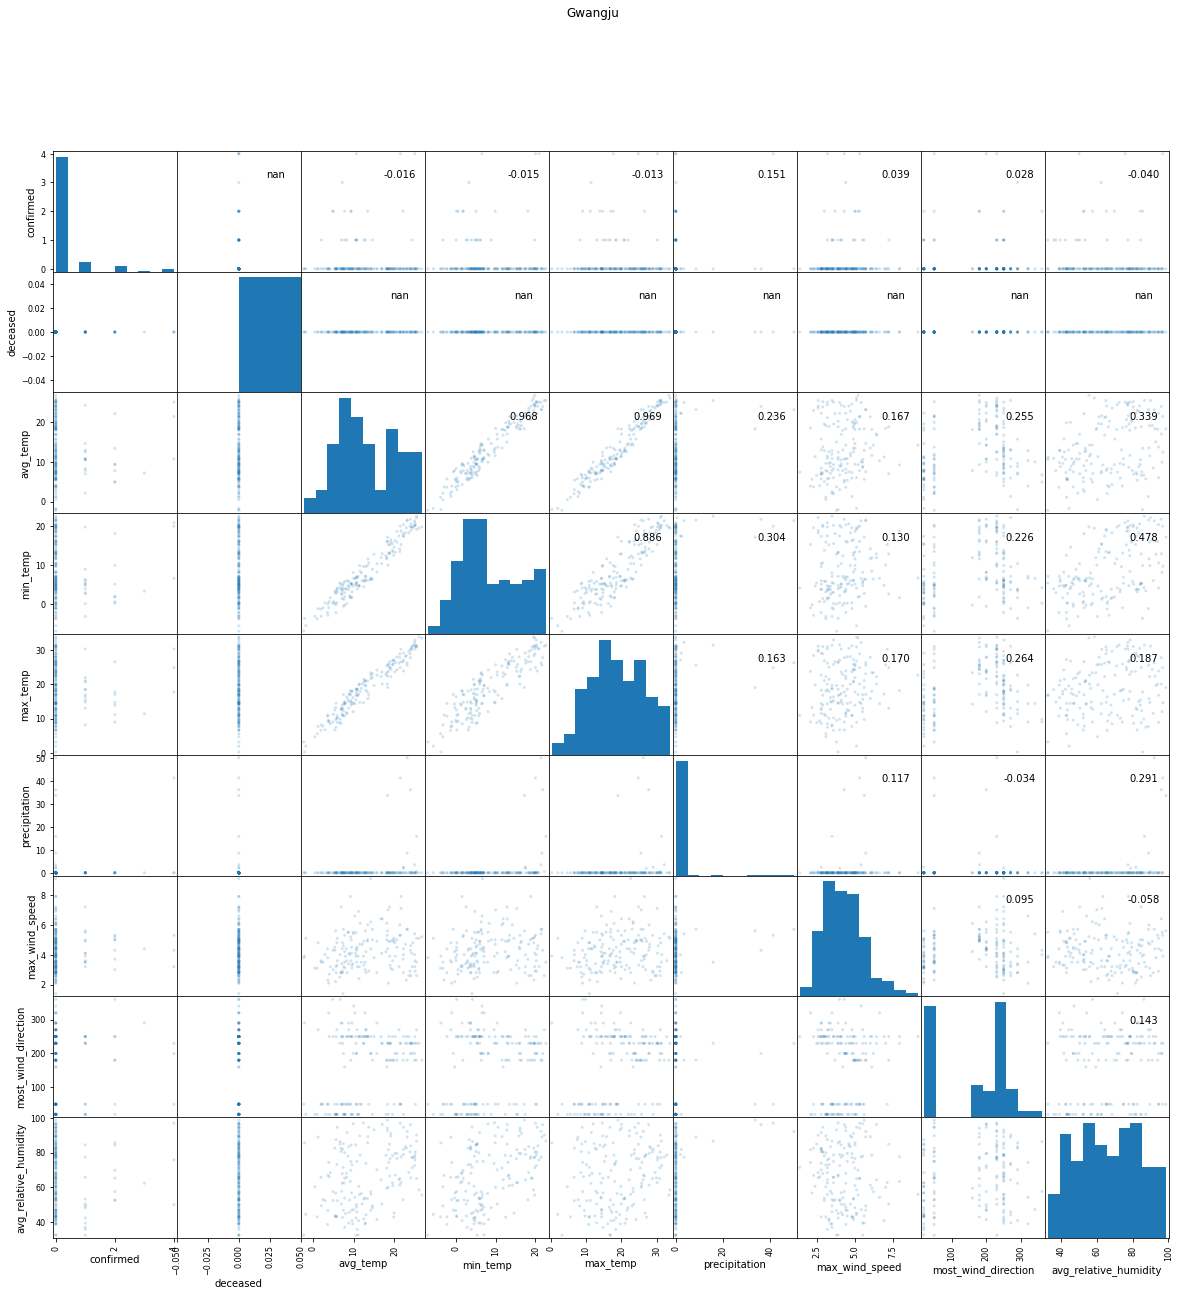

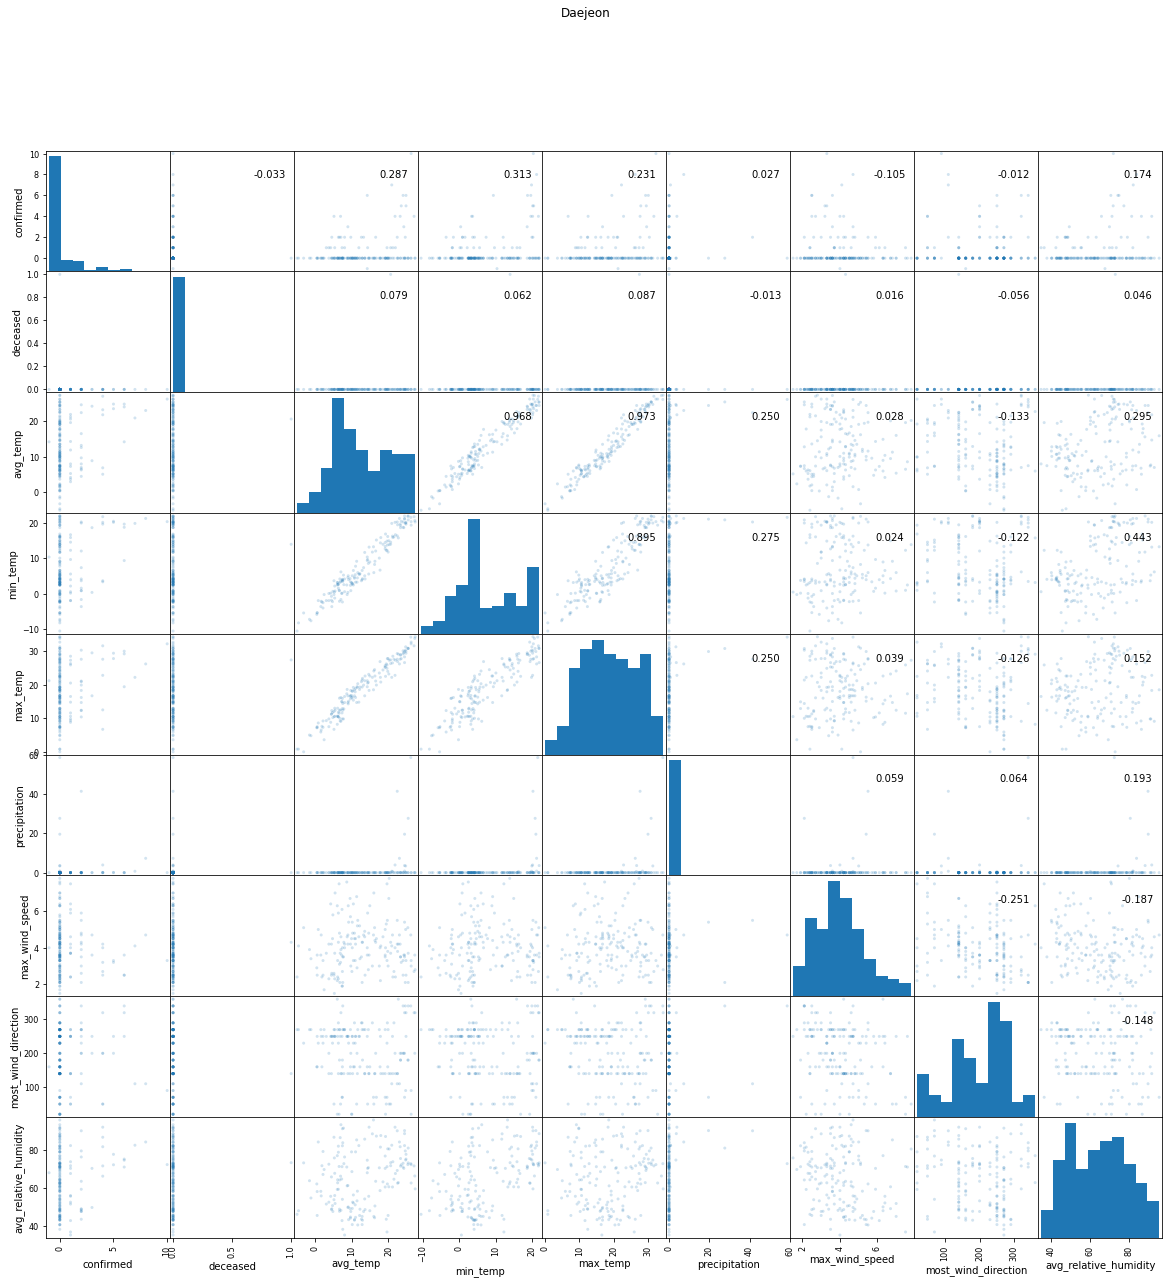

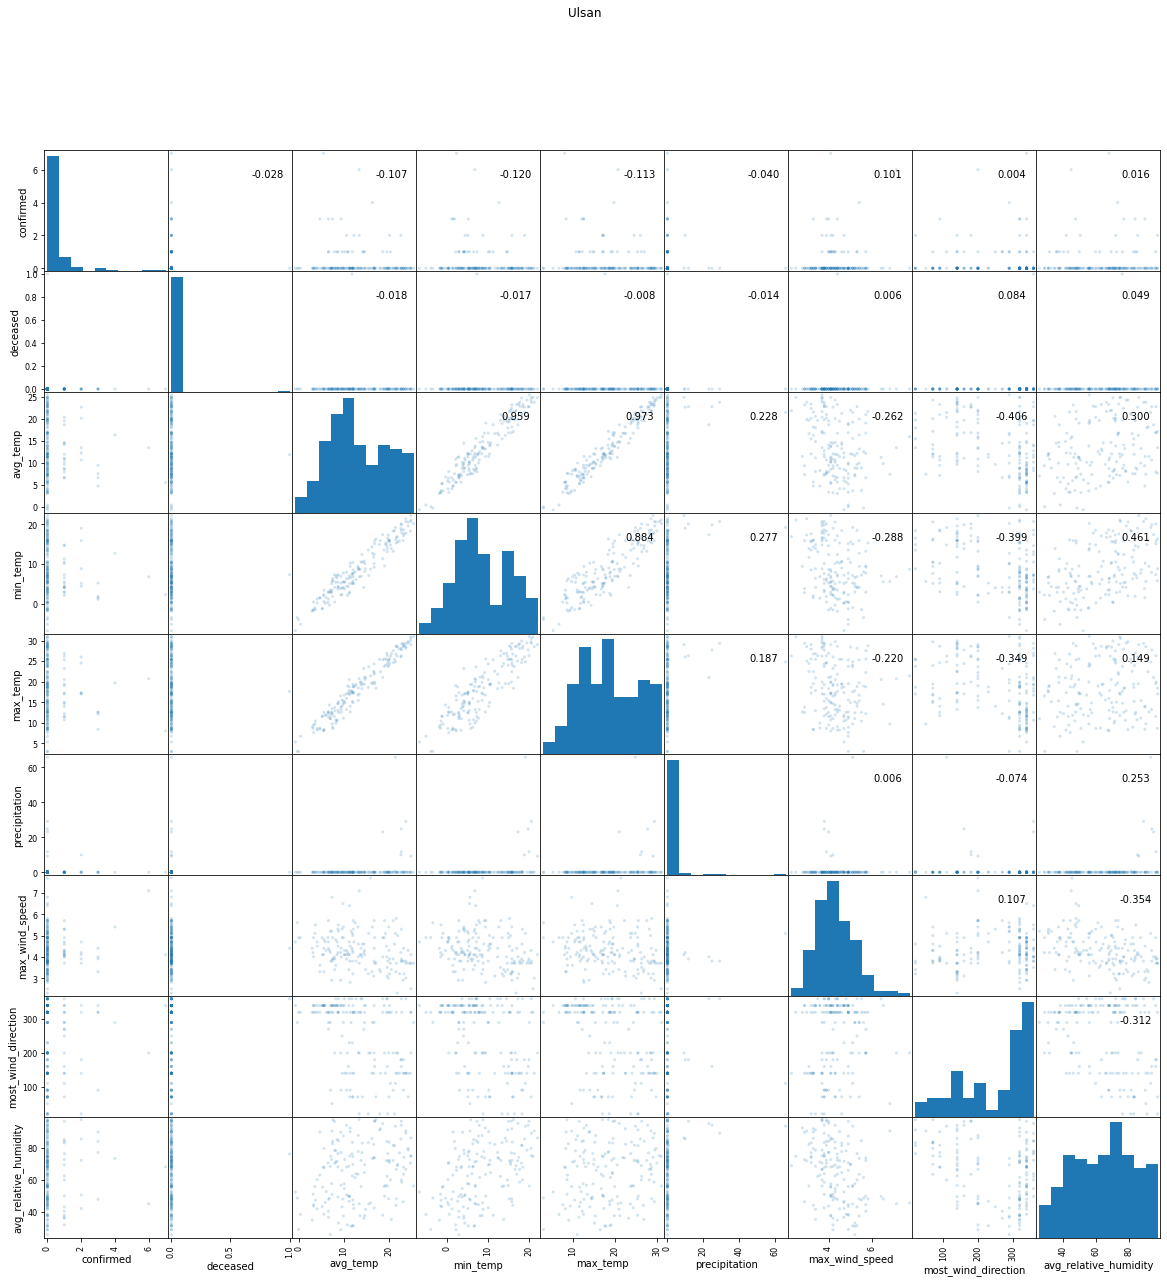

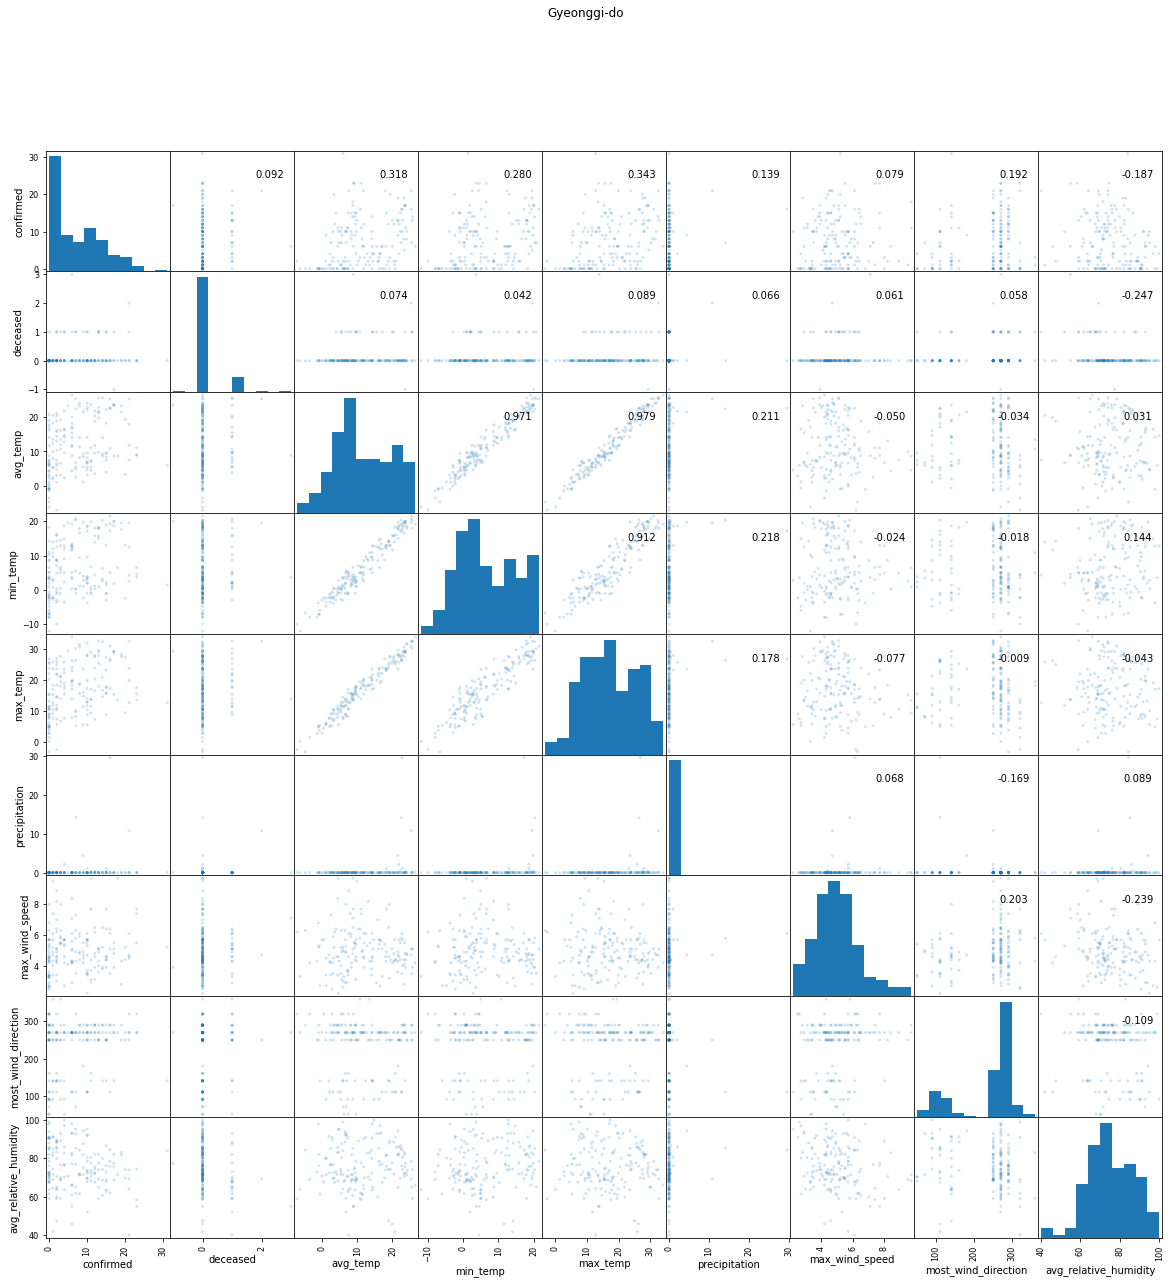

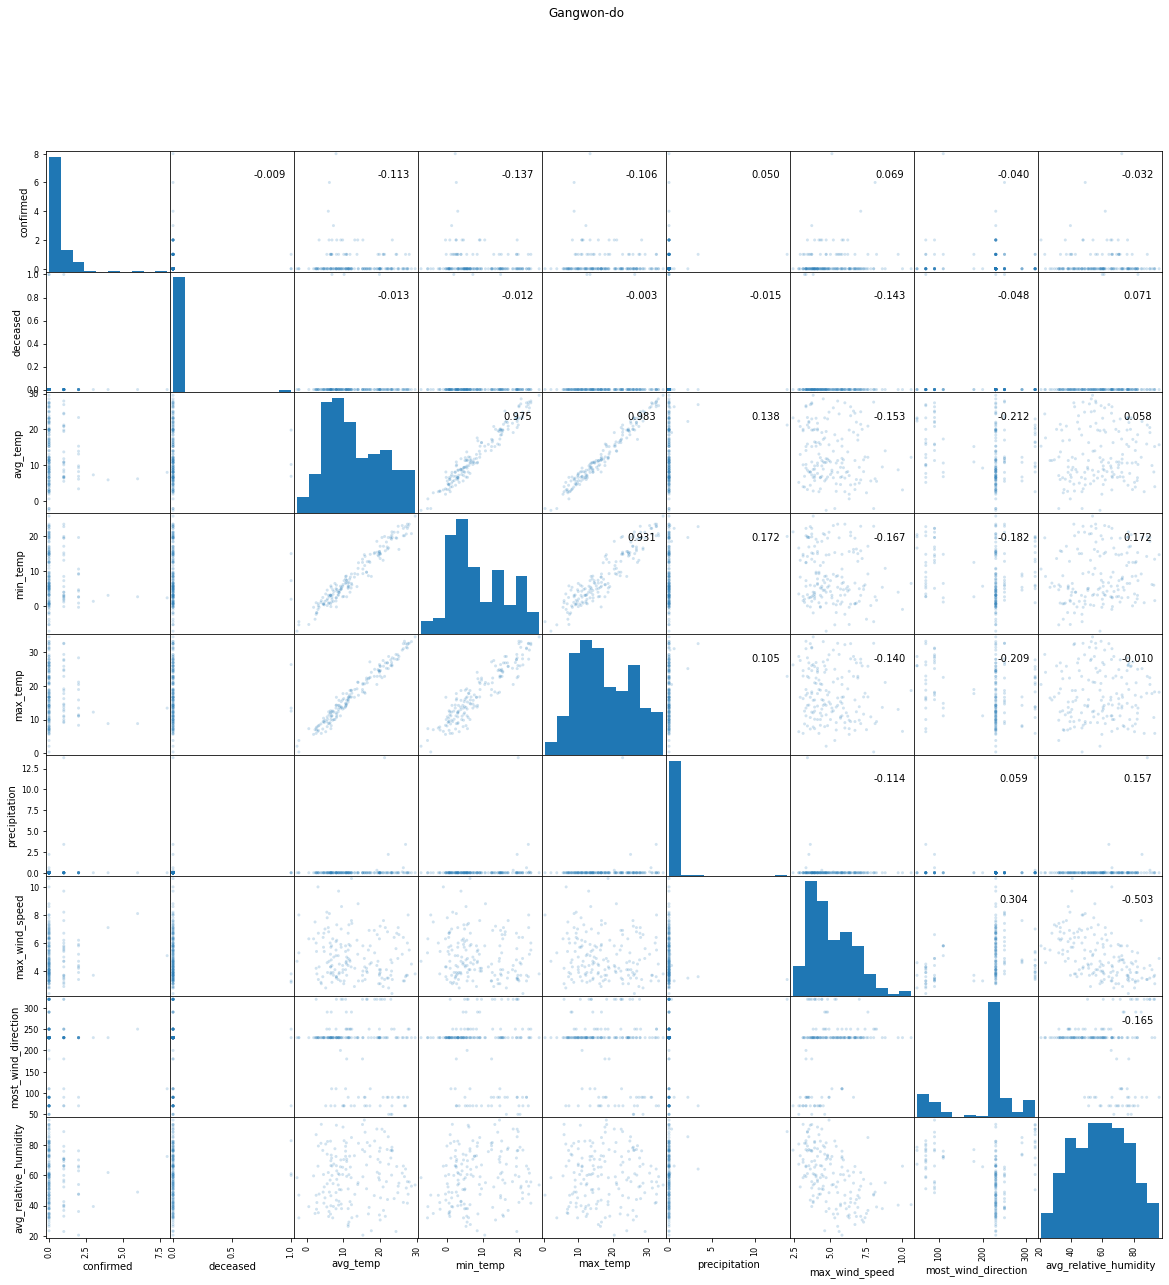

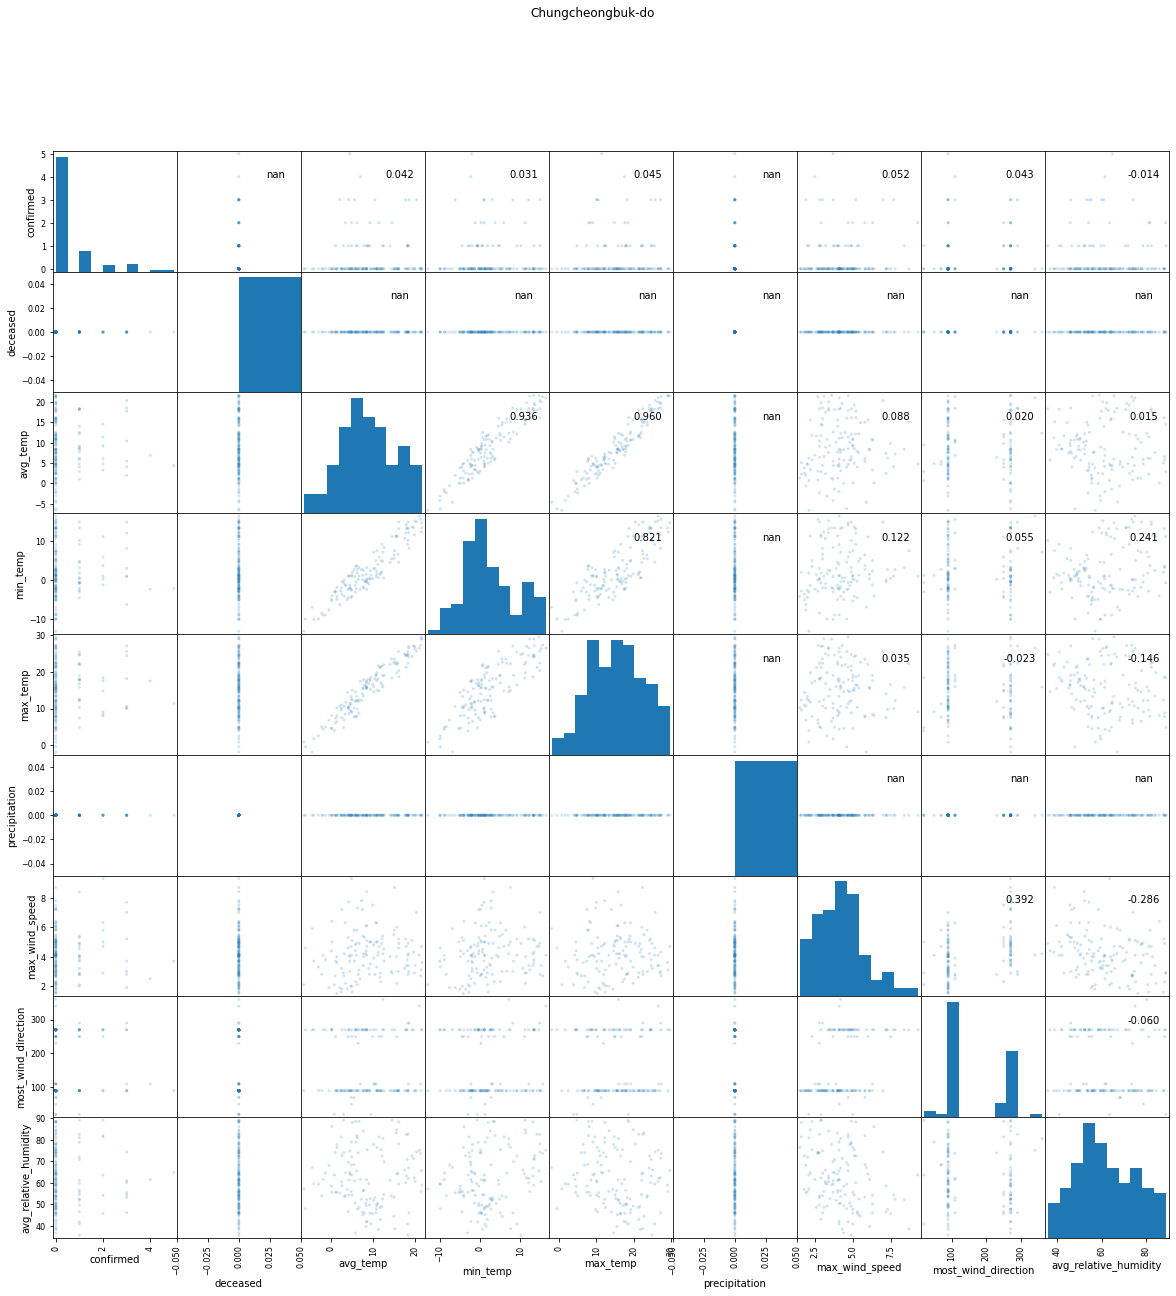

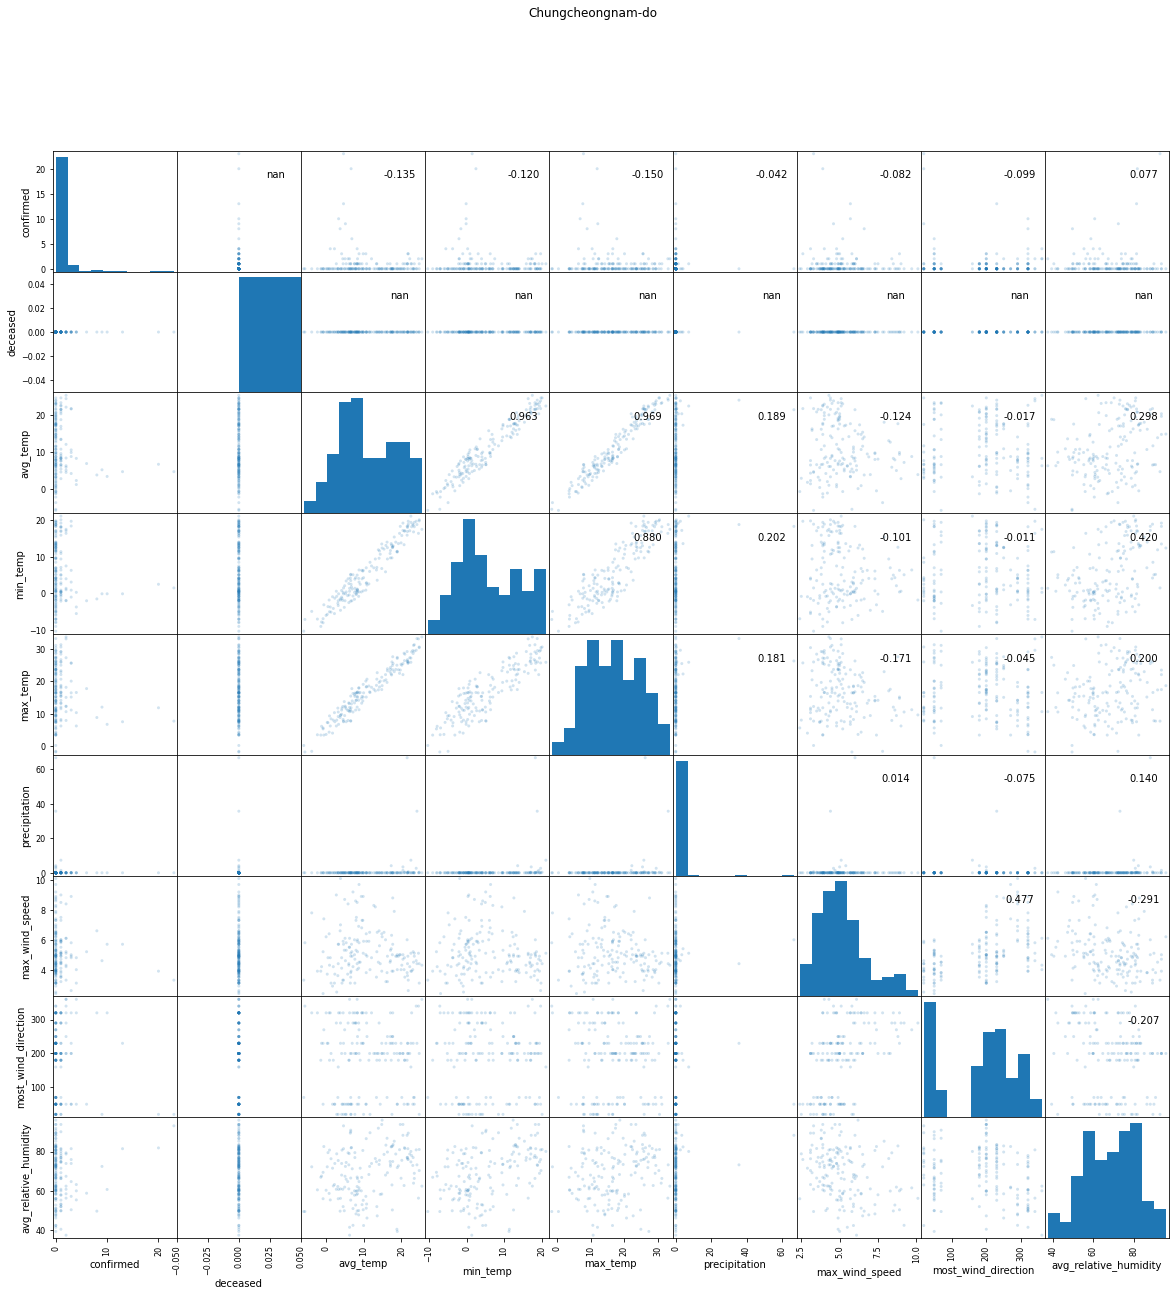

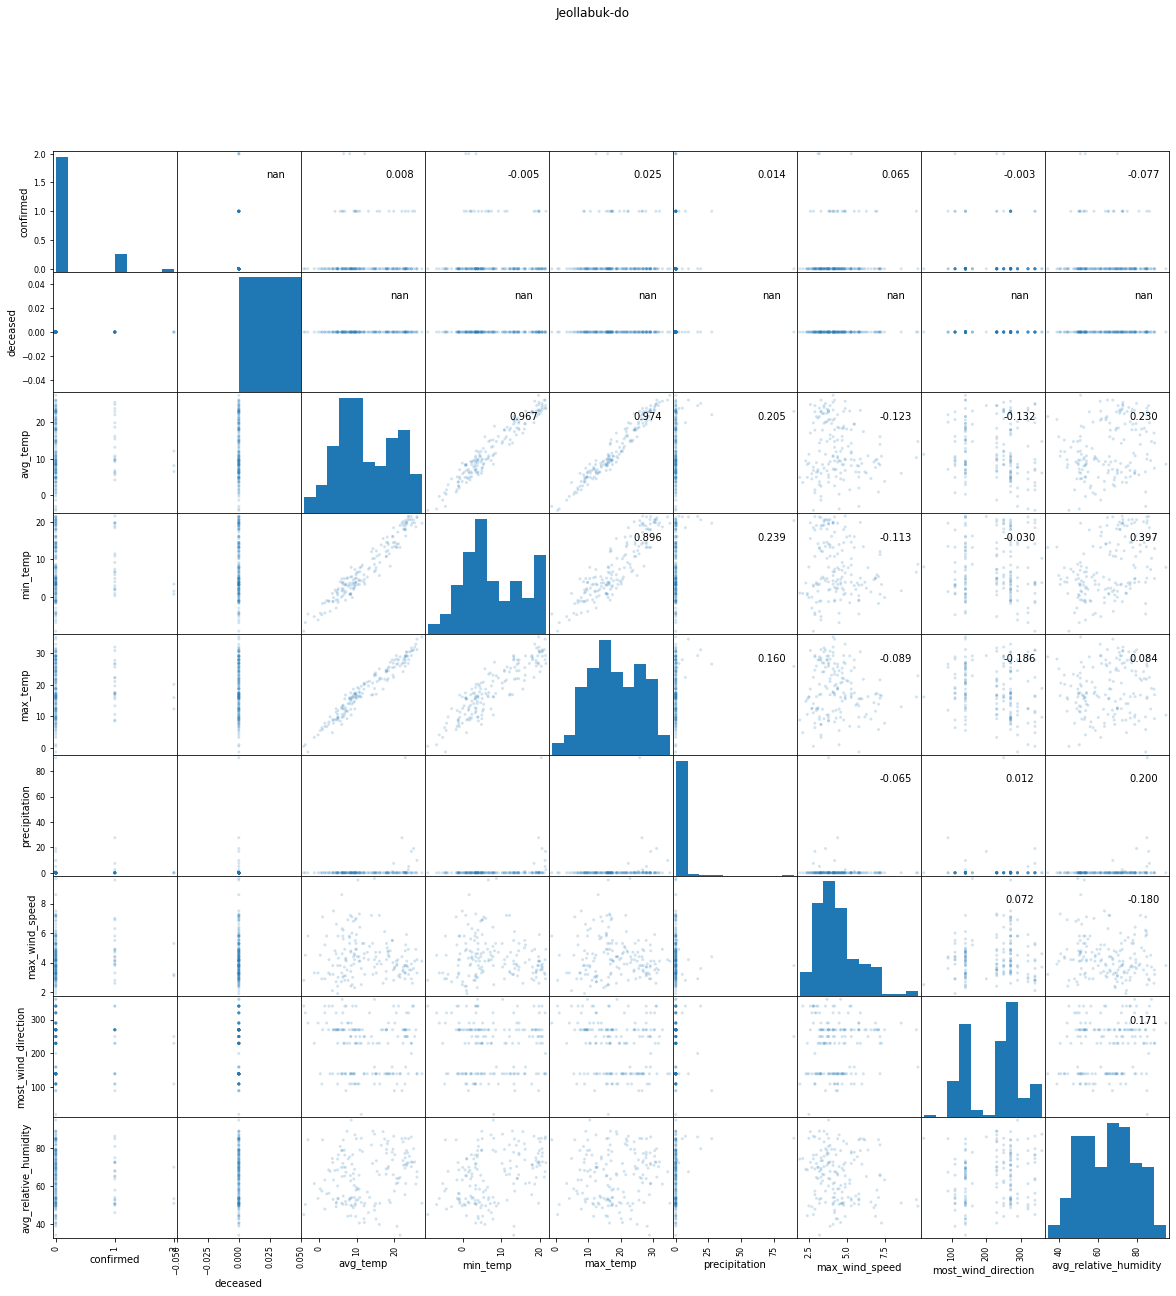

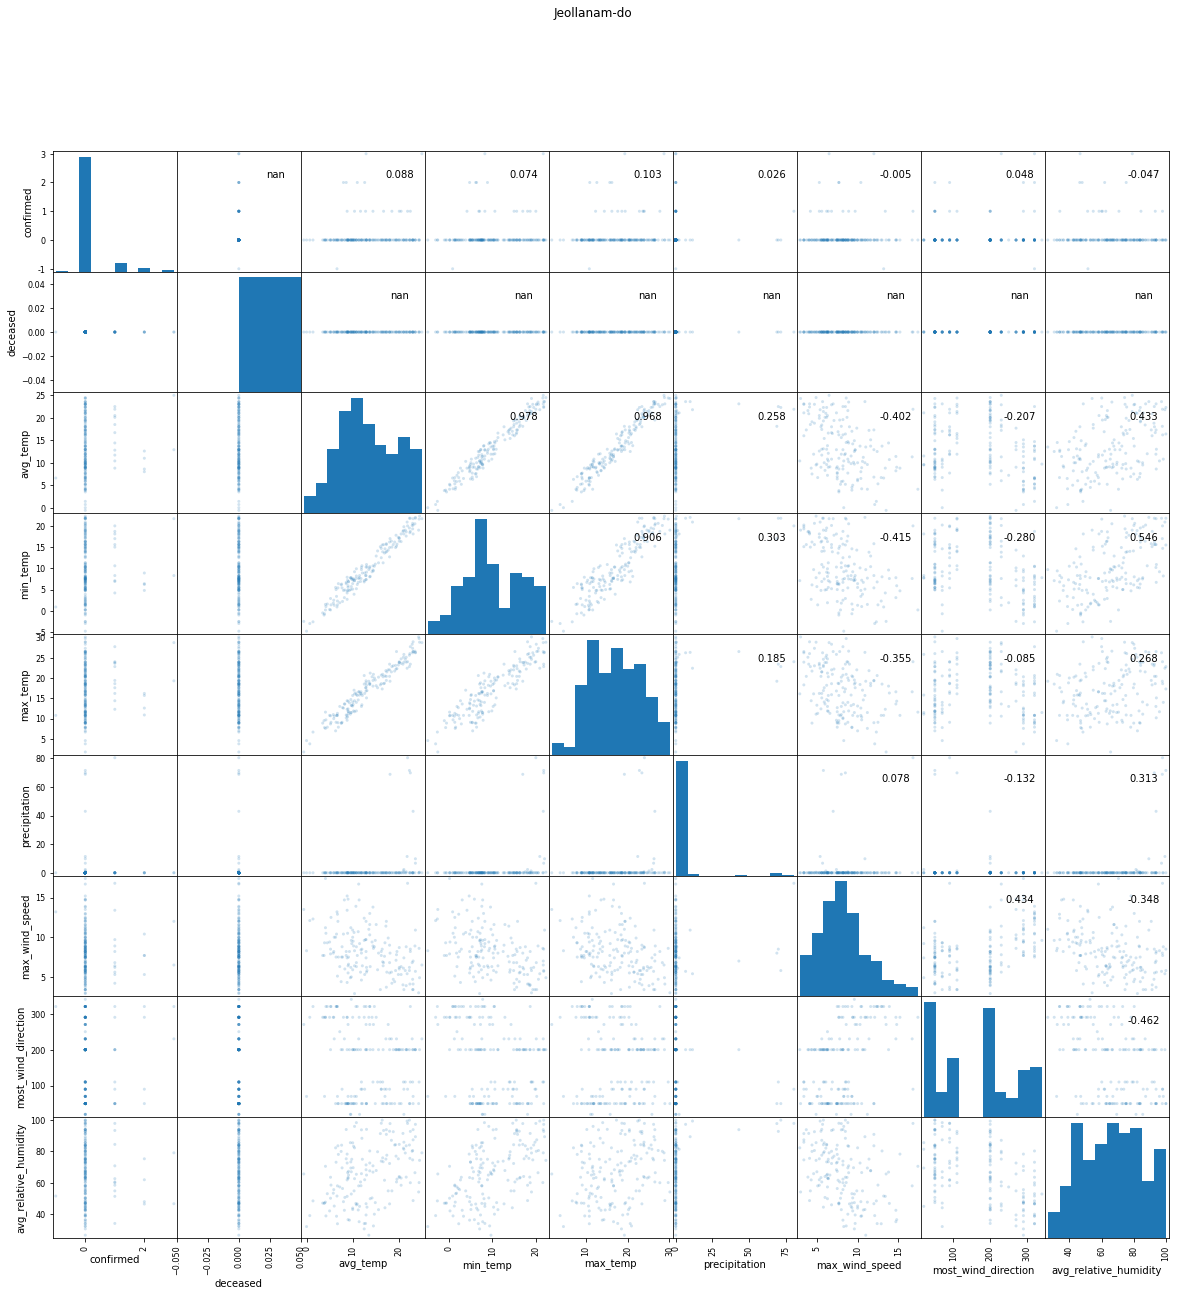

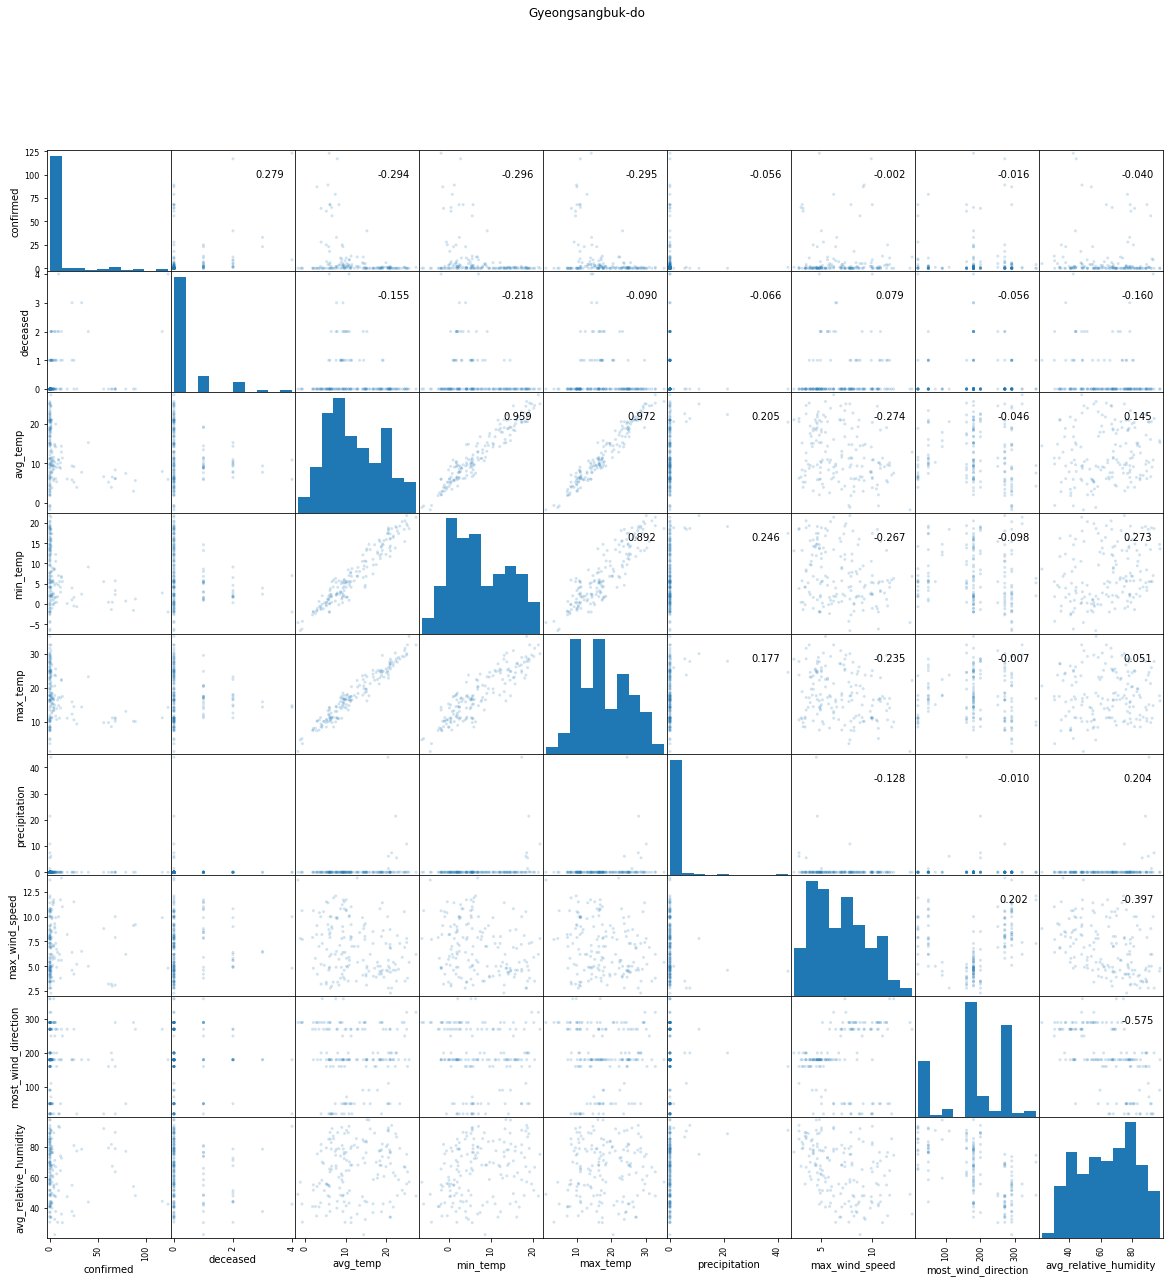

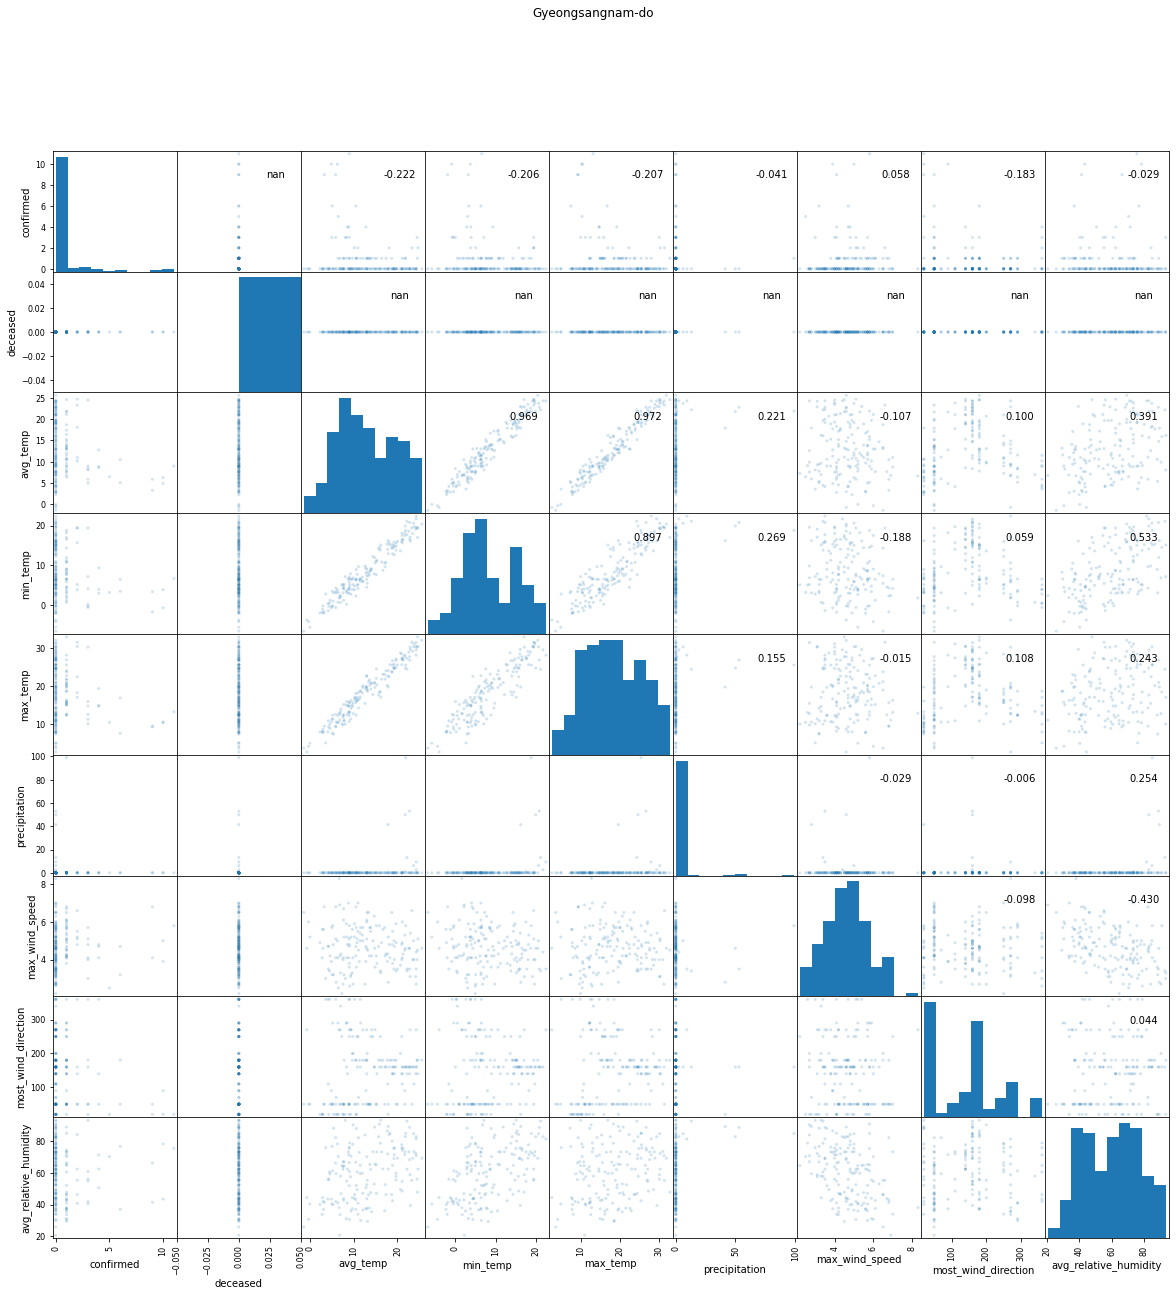

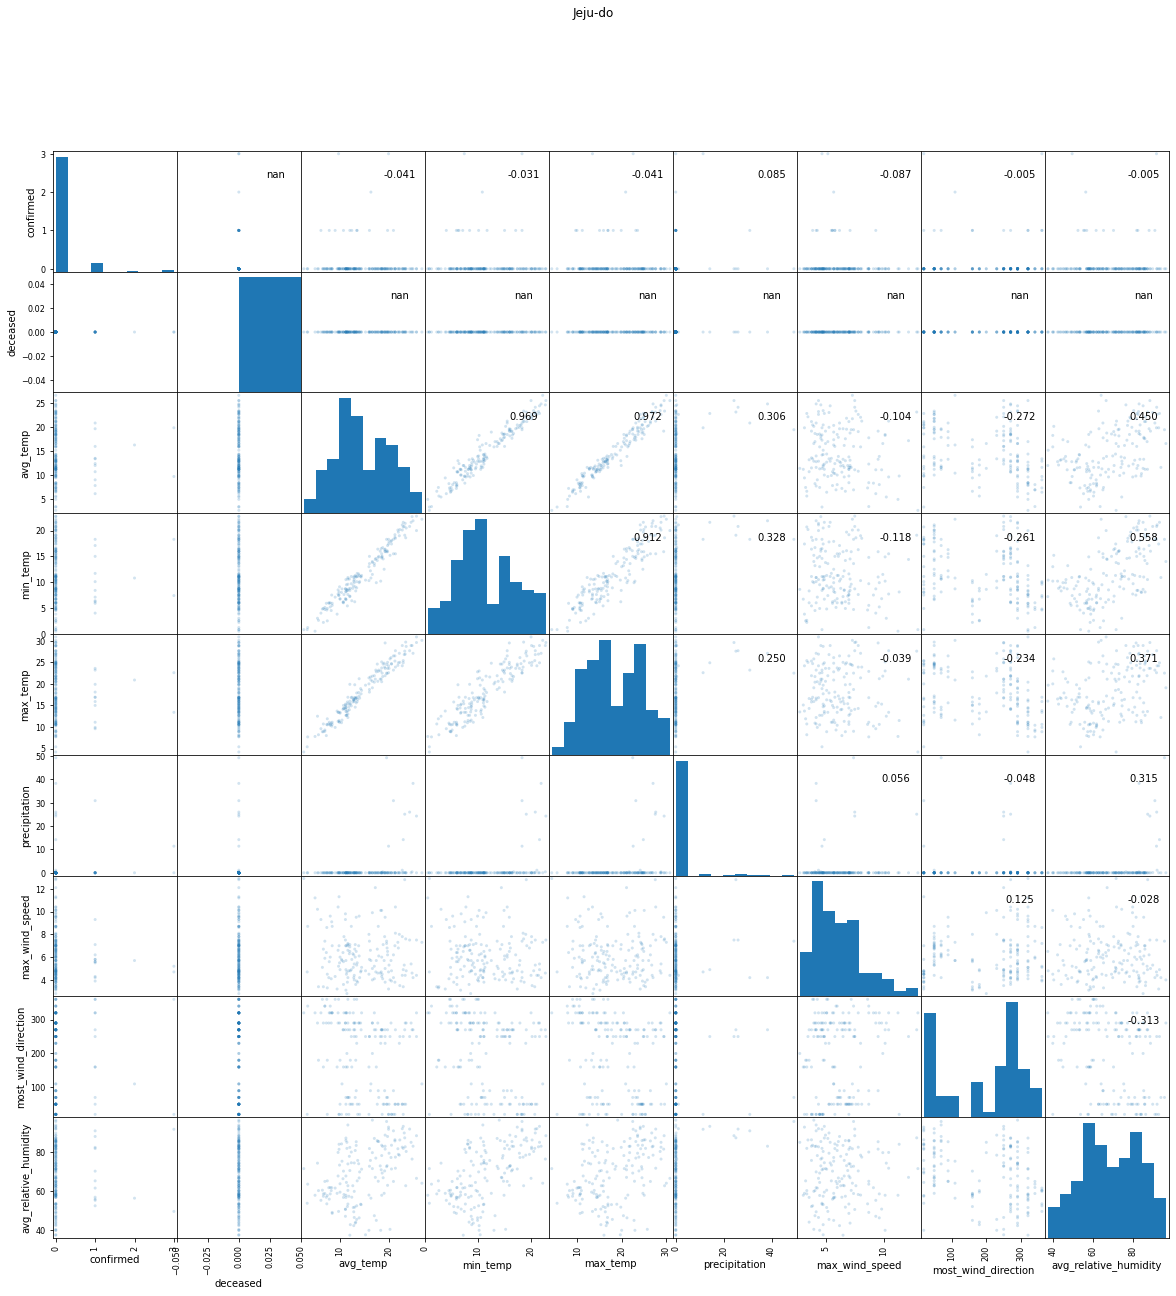

In [60]:
for p in df.index.get_level_values(1).unique():
    try:
        p_df = df[df.index.get_level_values(1)==p]
        axes = scatter_matrix(p_df, alpha = 0.2, figsize = (20,20), diagonal = 'hist')
        corr = p_df.corr().values # let's show correlations on each subplot
        for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
            axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
        plt.suptitle(p);
    except:
        pass